<a href="https://colab.research.google.com/github/patelmedha/project2/blob/main/PROJECT_2_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 2**

In [40]:
#Imports
## Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Numpy
import numpy as np

##Seaborn
import seaborn as sns

##Matplotlib
import matplotlib.pyplot as plt

# CHOICE 1: Stroke Prediction
**Context**
  - According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
  

1. Source of data
  - Source : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data
 - - This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

3. What is the target?
  - Target column is stroke. Predicting whether patient will suffer from a stroke or not.
   

4. What does one row represent? (A person? A business? An event? A product?)

    - **Attribute Information**
  1. id: unique identifier
  2. gender: "Male", "Female" or "Other"
  3. age: age of the patient
  4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
  5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
  6. ever_married: "No" or "Yes"
  7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
  8. Residence_type: "Rural" or "Urban"
  9. avg_glucose_level: average glucose level in blood
  10. bmi: body mass index
  11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
  12. stroke: 1 if the patient had a stroke or 0 if not
  
  *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

5. Is this a classification or regression problem?
  - Classification problem

6. How many features does the data have?
  - 11 features

7. How many rows are in the dataset?
  - 5110 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This data  has 201 missing values in the BMI column.

## Load Data and Inspect Data

In [41]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

stroke_fpath = '/content/drive/MyDrive/CodingDojo/PROJECT 2/healthcare-dataset-stroke-data.csv'
df_stroke = pd.read_csv(stroke_fpath)
df_stroke.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
#Display number of rows and columns for the dataframe
print(f'There are {df_stroke.shape[0]} rows, and {df_stroke.shape[1]} columns.')
print(f'The rows represent {df_stroke.shape[0]} observations, and the columns represent {df_stroke.shape[1]-1} features and 1 target variable.')


There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [43]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Duplicated Data

In [44]:
#Duplicate Rows
df_stroke.duplicated().sum().sum()

0

- There are no duplicate rows to drop.

### Missing Values

In [45]:
#Missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [46]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  2.01
smoking_status       0.00
stroke               0.00
dtype: float64

<Axes: >

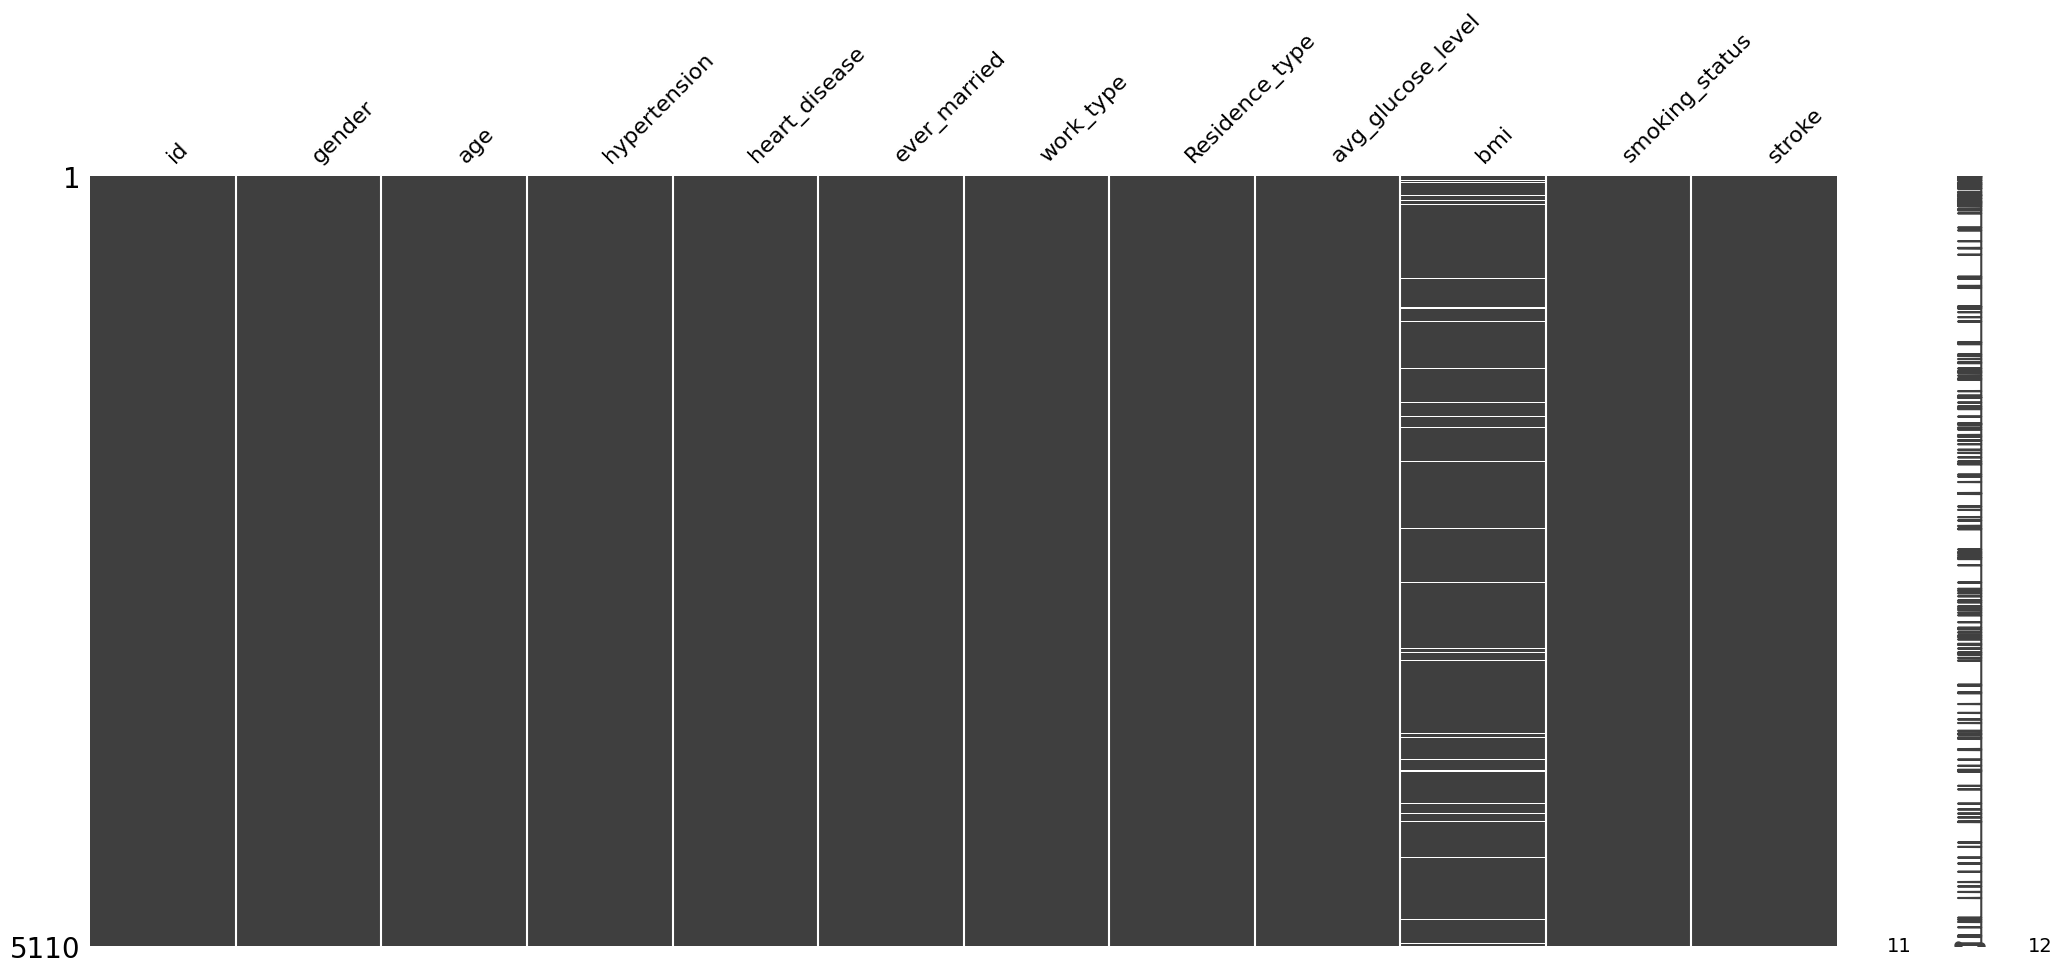

In [47]:
#Visualizing Missing Values with Missingno
import missingno as msno
msno.matrix(df_stroke)

- BMI - 2.01% missing values
  - Dropping these rows can be justified since less than 5% data is missing.

In [48]:
df_stroke.dropna(subset=['bmi'],inplace=True)

In [49]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### Unique Values

In [50]:
df_stroke.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [51]:
df_stroke.nunique()/len(df_stroke) * 100


id                   100.000000
gender                 0.061112
age                    2.118558
hypertension           0.040741
heart_disease          0.040741
ever_married           0.040741
work_type              0.101854
Residence_type         0.040741
avg_glucose_level     78.468120
bmi                    8.514972
smoking_status         0.081483
stroke                 0.040741
dtype: float64

- id column has 100% unique values- this column can be dropped.

In [52]:
df_stroke.drop(columns= 'id', inplace=True)
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


### Data Consistency

#### Categorical Columns

In [55]:
#Save list for categorical column name.
cat_col = df_stroke.select_dtypes('object').columns
cat_col

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
#Check for nunique for categorical columns
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')


#### Numeric Columns

In [59]:
#Save list for numeric column name.
num_col = df_stroke.select_dtypes(['int', 'float']).columns
num_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [60]:
#Check for nunique for categorical columns
for col in num_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')

Value Counts for age
78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64


Value Counts for hypertension
0    4458
1     451
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4666
1     243
Name: heart_disease, dtype: int64


Value Counts for avg_glucose_level
93.88     6
72.49     5
83.16     5
73.00     5
91.68     5
         ..
72.06     1
97.90     1
230.59    1
224.63    1
85.28     1
Name: avg_glucose_level, Length: 3852, dtype: int64


Value Counts for bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


Value Counts for stroke
0    4700
1     209
Name: stroke, dtype: int64




#### Summary Statistic for Numeric Columns
  - For any numeric columns obtain the summary statistics of each(min,max,mean).

In [ ]:
#Descriptive Summary for numerical columns
df_stroke.describe(include='number')

## Exploratory Data Analysis

##### Categorical Columns
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'

###### 'gender'

###### 'ever_married'

###### 'work_type'

###### 'Residence_type'

###### 'smoking_status'

##### Numeric Columns

###### 'age'

###### 'hypertension'

###### 'heart_disease'

###### 'avg_glucose_level'

###### 'bmi'

###### 'stroke'